In [95]:
import pandas as pd

In [96]:
# https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-in-commodity-market-gold
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [98]:
df = df.drop(columns=['Dates', 'URL', 'Price Direction Up', 'Price Direction Constant', 'Price Direction Down', 'Asset Comparision', 'Past Information', 'Future Information'])

In [99]:
df['Price Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

In [100]:
sentiment = pd.get_dummies(df['Price Sentiment'])
df = pd.concat([df, sentiment], axis=1)
df = df.drop(columns=['Price Sentiment'])
df

,News,negative,neutral,none,positive
0,"april gold down 20 cents to settle at $1,116.1...",1,0,0,0
1,gold suffers third straight daily decline,1,0,0,0
2,Gold futures edge up after two-session decline,0,0,0,1
3,dent research : is gold's day in the sun comin...,0,0,1,0
4,"Gold snaps three-day rally as Trump, lawmakers...",1,0,0,0
...,...,...,...,...,...
10565,gold seen falling from 3-week high this week,1,0,0,0
10566,dominic frisby : now looks like a good time to...,0,0,0,1
10567,Gold heading for worst week since November on ...,1,0,0,0
10568,august gold up $7.60 at $878.80 an ounce on nymex,0,0,0,1


In [101]:
import re

df['News'] = df['News'].map(lambda x: re.sub(r'\W+', ' ', x))
df['News'] = df['News'].map(lambda d: re.sub(r'\d+', '', d))
df

,News,negative,neutral,none,positive
0,april gold down cents to settle at oz,1,0,0,0
1,gold suffers third straight daily decline,1,0,0,0
2,Gold futures edge up after two session decline,0,0,0,1
3,dent research is gold s day in the sun coming ...,0,0,1,0
4,Gold snaps three day rally as Trump lawmakers ...,1,0,0,0
...,...,...,...,...,...
10565,gold seen falling from week high this week,1,0,0,0
10566,dominic frisby now looks like a good time to b...,0,0,0,1
10567,Gold heading for worst week since November on ...,1,0,0,0
10568,august gold up at an ounce on nymex,0,0,0,1


In [102]:
text = df['News'].values
label = df[['positive', 'negative', 'none', 'neutral']].values

In [103]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=1)

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

In [105]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

In [106]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [107]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [108]:
num_epochs = 30

history = model.fit(
    padded_train,
    label_train,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2
)

Epoch 1/30
265/265 - 8s - loss: 0.8583 - accuracy: 0.6211 - val_loss: 0.3911 - val_accuracy: 0.8756 - 8s/epoch - 29ms/step
Epoch 2/30
265/265 - 5s - loss: 0.3524 - accuracy: 0.8833 - val_loss: 0.3333 - val_accuracy: 0.8945 - 5s/epoch - 17ms/step
Epoch 3/30
265/265 - 4s - loss: 0.2214 - accuracy: 0.9307 - val_loss: 0.3231 - val_accuracy: 0.8997 - 4s/epoch - 15ms/step
Epoch 4/30
265/265 - 4s - loss: 0.1607 - accuracy: 0.9501 - val_loss: 0.3424 - val_accuracy: 0.8974 - 4s/epoch - 15ms/step
Epoch 5/30
265/265 - 4s - loss: 0.1233 - accuracy: 0.9605 - val_loss: 0.3569 - val_accuracy: 0.8893 - 4s/epoch - 15ms/step
Epoch 6/30
265/265 - 4s - loss: 0.1036 - accuracy: 0.9693 - val_loss: 0.4375 - val_accuracy: 0.8851 - 4s/epoch - 15ms/step
Epoch 7/30
265/265 - 4s - loss: 0.0881 - accuracy: 0.9711 - val_loss: 0.4646 - val_accuracy: 0.8917 - 4s/epoch - 15ms/step
Epoch 8/30
265/265 - 4s - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.4144 - val_accuracy: 0.8841 - 4s/epoch - 15ms/step
Epoch 9/30
265/2

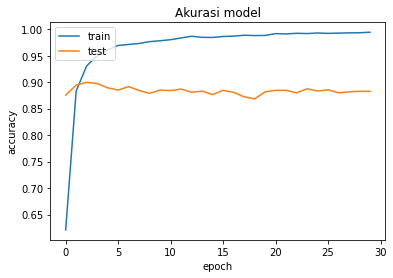

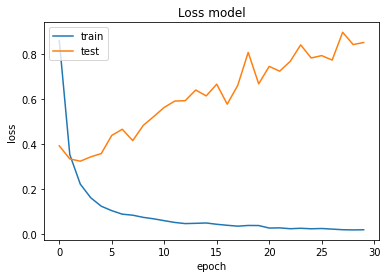

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()